In [1]:
from bs4 import BeautifulSoup
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import LineString

In [2]:
def process_coord_string(coord_string):
    """
    Take a coord string and spit out long/lat floats
    """
    space_splits = coord_string.split(' ')
    path_points = list()
    for split in space_splits:
        comma_split = split.split(',')
        lat = float(comma_split[1]) # lat
        lon = float(comma_split[0]) # long
        path_points.append(tuple([lat, lon]))
    return path_points

In [3]:
def process_place(placemark):
    """Process placemark data from a KML file"""
    place_dict = dict()
    for i in placemark.find_all('SimpleData'):
        place_dict[i['name']] = i.text
        
    try:
        place_dict['lat_lon_list'] = process_coord_string(placemark.find('coordinates').string)
        place_dict['line'] = LineString(place_dict['lat_lon_list'])
        place_dict['mid_point'] = place_dict['line'].interpolate(0.5, normalized = True)
    except:
        place_dict['lat_lon_list'] = np.nan
        place_dict['line'] = np.nan
        place_dict['mid_point'] = np.nan

    return place_dict

# Parsing Coordinates in KML

## Read file

In [2]:
with  open('VT_Annual_Average_Daily_Traffic_AADT__2017.kml', encoding='utf8') as f:
    s = BeautifulSoup(f, 'xml')

# Parsing data in KML

In [6]:
placemarks = s.find_all('Placemark')

In [7]:
place = placemarks[100]

## Testing Place Parsing

In [12]:
place_dict = process_place(placemarks[500])

In [13]:
place_dict = dict()
for i in place.find_all('SimpleData'):
    place_dict[i['name']] = i.text
    #print("{}: {}".format(i['name'], i.text))

In [14]:
place_dict['lat_lon_list'] = process_coord_string(place.find('coordinates').string)
place_dict['line'] = LineString(latlon)
place_dict['mid_point'] = line.interpolate(0.5, normalized = True)

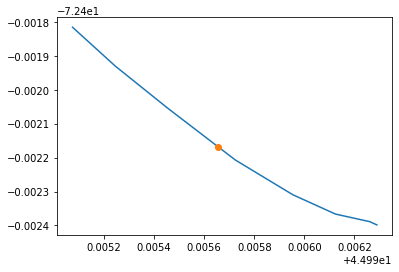

In [15]:
x, y = place_dict['line'].xy
plt.plot(x, y)
x, y = place_dict['mid_point'].xy
plt.plot(x, y, marker='o')
None

```python
place_list = list()
for n, place in enumerate(placemarks):
    print(n, end=', ')
    place_list.append(process_place(place))
```

## Place Parsing for reals

In [16]:
place_list = [process_place(i) for i in placemarks]

In [17]:
df = pd.DataFrame(place_list)

In [18]:
df.shape

(3543, 29)

In [19]:
test = df.dropna(axis='rows', subset=['lat_lon_list', 'line', 'mid_point'])

In [20]:
test.columns

Index(['OBJECTID', 'AADT', 'BeginMM', 'BeginRefName', 'BeginStation', 'CTCode',
       'EndMM', 'EndRefName', 'EndRefNum', 'EndStation', 'ETE_ID',
       'ETE_BeginMM', 'ETE_EndMM', 'FunctionalClass', 'RouteName', 'RouteType',
       'SectionNum', 'StandardRouteCode', 'Status', 'TownName', 'Year',
       'IsDivided', 'lat_lon_list', 'line', 'mid_point', 'ATRStation',
       'ATRStatus', 'BeginRefNum', 'RouteNum'],
      dtype='object')

### Saving placemarkers to a csv
Might have to re-calculat

```python
test.to_csv('vt_2017_avg_daily_traffic_190919.csv')
```

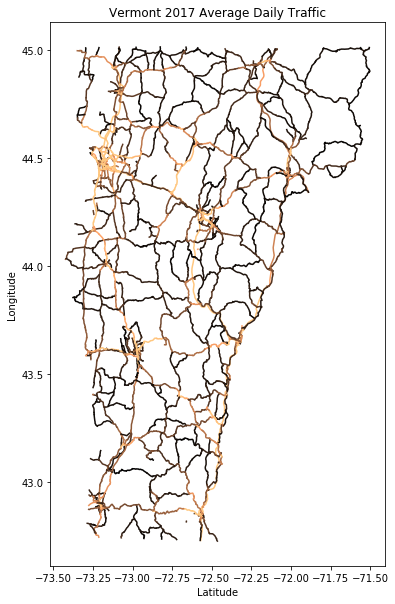

In [24]:
colors = plt.get_cmap('copper', lut=test.AADT.max())
plt.figure(figsize=(6,10))

for index, row in test.iterrows():    
    y, x = test.loc[index, 'line'].xy
    plt.plot(x, y, color=colors(int(test.loc[index, 'AADT'])))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Vermont 2017 Average Daily Traffic')
#plt.savefig('vt_2017_avg_daily_traffic.svg')

# All roads in VT

Note that this file loaded to be 12x the size of the original xml file.

In [4]:
with  open('VT_Road_Centerline.kml', encoding='utf8') as f:
    centerline_soup = BeautifulSoup(f, 'xml')

In [5]:
placemarks = centerline_soup.find_all('Placemark')

In [6]:
place_list = [process_place(i) for i in placemarks]

In [7]:
df = pd.DataFrame(place_list)

In [8]:
df.shape

(76163, 70)

In [9]:
76163 / 3543

21.496754163138583

In [16]:
test = df.dropna(axis='rows', subset=['lat_lon_list', 'line', 'mid_point'])

In [17]:
test.shape

(76163, 70)

In [20]:
test.columns

Index(['OBJECTID', 'AADT', 'BeginMM', 'BeginRefName', 'BeginStation', 'CTCode',
       'EndMM', 'EndRefName', 'EndRefNum', 'EndStation', 'ETE_ID',
       'ETE_BeginMM', 'ETE_EndMM', 'FunctionalClass', 'RouteName', 'RouteType',
       'SectionNum', 'StandardRouteCode', 'Status', 'TownName', 'Year',
       'IsDivided', 'lat_lon_list', 'line', 'mid_point', 'ATRStation',
       'ATRStatus', 'BeginRefNum', 'RouteNum'],
      dtype='object')

In [ ]:
#```python
test.to_csv('vt_all_roads_190930.csv')
#```

21 minutes

In [10]:
157 / 3670

0.042779291553133515

In [11]:
21*20/60

7.0

In [13]:
(7*21)/24

6.125

In [14]:
df.head()

,OBJECTID,SEGMENTID,ARCID,PD,PT,SN,ST,SD,GEONAMEID,PRIMARYNAME,...,last_edited_user,last_edited_date,created_user,created_date,ALIAS5,ALIAS1,ALIAS2,ALIAS3,ALIAS4,ROADCLOSED
0,1,16773,296,,,SMOKESHIRE,RD,,4768,SMOKESHIRE RD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,254482,1604,,,MAIN,ST,,1869,MAIN ST,...,HMSADMIN,2019-05-24T19:59:15.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,54238,57,,,GUILFORD CENTER,RD,,8755,GUILFORD CENTER RD,...,HMSADMIN,2017-07-10T12:37:44.000Z,HMSADMIN,2017-03-15T19:11:58.000Z,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for i, val in df.iloc[50000,:].items():
    print('{}:{}'.format(i,val))

OBJECTID:50001
SEGMENTID:27266
ARCID:193
PD:
PT:
SN:FAIRWOOD
ST:PKWY
SD:E
GEONAMEID:13098
PRIMARYNAME:FAIRWOOD PKWY E
SURFACETYPE:Paved
ONEWAY:No
RTNAME:TH-516
RTNUMBER:516
HWYSIGN:TH-516
RPCCLASS:3
AOTCLASS:Town Highway Class 3
NUTS:N
NHS:0
FUNCL:7
TWN_LR:L0807003516
ETE_LR:-
CTCODE:0807
UA:1
CTUA:0807-1
CERTCODE:0807-0
ARCMILES:0.068666
AOTMILES:0.07
AOTMILES_CALC:0
UPDACT:-
LOCMETH:1
SRCORG:26
SCENICHWY:0
SCENICBYWAY:0
ANCIENTROADYEAR:0
TRUCKROUTE:0
ISVISIBLE:1
GlobalID:{E9C7DF10-6B41-4B55-9B98-36A368E28D1E}
FIPS8:50015035
RTNUMBER_N:516
RDNAME:13098
RDFLNAME:FAIRWOOD PKWY E
ISVISIBLE_UC:0
FUNCL_OLD:9
Urban_Code:99999
FAID:500150350193
FED_AID:-
Facility_Type:2
PENT:N
TOWNGEOID:5001546675
StartNodeID:3311
EndNodeID:6099
Ownership:3
lat_lon_list:[(44.556670913299016, -72.58117137363784), (44.55692608731772, -72.58085781746333), (44.55720527982974, -72.5805568783893), (44.557440080459074, -72.5802904889969)]
line:LINESTRING (44.55667091329902 -72.58117137363784, 44.55692608731772 -72.

In [40]:
df.SCENICBYWAY.value_counts(dropna=False)

0       72489
100      1095
200       770
800       497
700       264
1000      246
900       206
500       196
300       196
400       112
600        92
Name: SCENICBYWAY, dtype: int64

In [39]:
df.ANCIENTROADYEAR.value_counts(dropna=False)

0       74902
2010      375
2012      345
2007      296
2008      101
2015       47
2011       41
2009       17
2006       12
2013       11
2017        6
2016        6
NaN         3
2014        1
Name: ANCIENTROADYEAR, dtype: int64

In [38]:
df.TRUCKROUTE.value_counts(dropna=False)

0      71546
300     2449
100     1842
500      109
400      103
600       99
200       14
NaN        1
Name: TRUCKROUTE, dtype: int64

In [37]:
df.ISVISIBLE.value_counts(dropna=False)

1    75477
0      686
Name: ISVISIBLE, dtype: int64

In [34]:
df.FUNCL_OLD.value_counts(dropna=False)

9      27391
0      21582
19      7147
7       6821
6       2749
8       2437
1       1712
17      1630
2       1323
16      1256
14      1067
11       432
NaN      358
12       258
Name: FUNCL_OLD, dtype: int64

In [33]:
df.FUNCL.value_counts(dropna=False)

7    34185
0    21789
5     8436
4     4069
6     2686
3     2580
1     2158
2      260
Name: FUNCL, dtype: int64

In [32]:
df.Ownership.value_counts(dropna=False)

3      44116
26     15744
1      10803
4       4785
11       366
NaN      186
64        95
74        48
63        17
80         3
Name: Ownership, dtype: int64

In [31]:
df.CERTCODE.value_counts(dropna=False)

1408-0    1408
0403-0    1280
0405-0    1272
0202-0    1138
0414-0    1061
          ... 
0204-0       9
0505-0       7
0519-0       6
0402-0       6
0502-0       2
Name: CERTCODE, Length: 269, dtype: int64

In [30]:
df.CERTYEAR.value_counts(dropna=False)

NaN     57425
0       15388
2010      537
2012      436
2007      320
2011      288
2008      260
2015      235
2014      224
2016      216
2013      193
2017      182
2009      146
2019      120
2018      120
9999       14
1993        7
2006        7
1954        5
1967        4
1996        4
1984        4
1964        4
1995        3
1970        3
1985        3
1986        3
2002        2
1968        2
1988        2
1974        2
1959        1
1963        1
1979        1
1983        1
Name: CERTYEAR, dtype: int64

In [29]:
df.PROVISIONALYEAR.value_counts(dropna=False)

0       52455
NaN     23340
1974      217
1973      113
1983        7
2013        6
1000        6
2005        3
2002        3
2007        3
2006        2
1990        2
2016        2
1975        2
1980        2
Name: PROVISIONALYEAR, dtype: int64

In [28]:
df.Urban_Code.value_counts(dropna=False)

99999    60144
99998     9489
11755     6530
Name: Urban_Code, dtype: int64

In [27]:
df.SPEEDLIMIT.value_counts(dropna=False)

NaN    70149
50      4009
65      1117
40       262
55       244
35       195
30        66
45        61
0         52
25         8
Name: SPEEDLIMIT, dtype: int64